## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part1-2: Finish the Solution Parse Part of Edit-Distance

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning  ---> reading
+ 黑客与画家 --->  看过
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: 遇到有重复子问题组成的复杂问题，可以采用动态规划，本质为不断查表过程，节省时间，提高效率，搜索包括深度搜索，广度搜索，这个问题一般不是由一系列的子问题组成的。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:能用动态规划解决的问题没有必要使用机器学习方法，动态规划利用子问题求解，得到的答案是高度正确的，机器学习方法用于很难获得right的回答，通过学习帮助得到一个近似正确的解

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:论文查重， 旅行商问题，字符串搜索，手写字符识别，etc

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: DNA检测，错别字修改，论文查重，搜狗拼音， 机器翻译与原文比对相似度，etc

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

+  不断递归的查找子问题与复杂问题之间的联系
+  过程存储子问题的解决方案
+  解决同样的子问题通过不断查表得出结果

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:空间换时间，如果子问题很多，查表速率很慢，对于高维度的问题不能很好解决

## Part 4 Preparation of Project-01  

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [28]:
latitudes = [random.randint(-100, 100) for _ in range(10)]
longitude = [random.randint(-100, 100) for _ in range(10)]

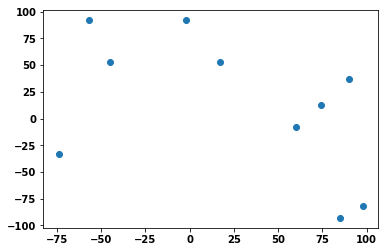

In [29]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [30]:
chosen_p = (5, 10)

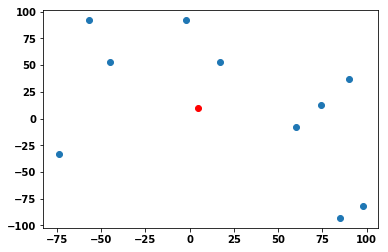

In [31]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [32]:
all_point = {(i,j) for i,j in zip(latitudes,longitude)}

In [33]:
coord_point = []
points = {}
points[0] = chosen_p
for i in range(len(latitudes)):
    points[i+1] = (latitudes[i], longitude[i])
points

{0: (5, 10),
 1: (74, 13),
 2: (-45, 53),
 3: (-57, 92),
 4: (90, 37),
 5: (17, 53),
 6: (85, -93),
 7: (98, -82),
 8: (-2, 92),
 9: (60, -8),
 10: (-74, -33)}

### 问题分析

     贪心：局部最优到全局最优
         从初始点开始，从剩余点找距离最短的点，再从找到的点开始找距离最小的点，也就是不断找在当前剩余点中距离最小的点
   
     动态规划：对其他子问题求解
   

In [7]:
import math

In [8]:
def get_distance(point1, point2):
    return math.sqrt(pow(point1[0]-point2[0],2)+ pow(point1[1]-point2[1],2))

In [34]:
distance_map = {}
for bh, point in points.items():
    point_temp = {}
    for bg_in, point_in in points.items():
        if bh == bg_in: continue
        if bg_in in distance_map:
            point_temp[(bg_in,bh)] = distance_map[bg_in][(bh, bg_in)]
        else:
            point_temp[(bg_in,bh)] = get_distance(point, point_in)
    distance_map[bh] = point_temp   

In [35]:
sorted_map = []
for i,points_temp in distance_map.items():
    sorted_map.append(sorted(points_temp.items(), key = lambda item:item[1]))

In [36]:
sorted_map[0]

[((5, 0), 44.64302857109943),
 ((9, 0), 57.87054518492115),
 ((2, 0), 65.94694837519019),
 ((1, 0), 69.06518659932803),
 ((8, 0), 82.29823813423954),
 ((4, 0), 89.1852005660132),
 ((10, 0), 89.94442728707543),
 ((3, 0), 102.80077820717118),
 ((6, 0), 130.41855696180662),
 ((7, 0), 130.8166656049603)]

In [37]:
sorted_map[0][0][0][0]

5

In [38]:
path = [] # 记录的是点的编号
ans = 0
while True:
    if len(path) == len(points): break
    if len(path) == 0:  # 假设起始点为点0
        path.append(0)
    frontitor = path[-1]
    for i in sorted_map[frontitor]:
        if i[0][0] in path: continue
        path.append(i[0][0])
        print('{}->{}:{}'.format(frontitor,i[0][0],i[1]))
        ans += i[1]
        break

0->5:44.64302857109943
5->8:43.382023926967726
8->3:55.0
3->2:40.80441152620633
2->10:90.75791976461338
10->9:136.31214179228496
9->1:25.238858928247925
1->4:28.844410203711913
4->7:119.26860441876563
7->6:17.029386365926403


In [39]:
path

[0, 5, 8, 3, 2, 10, 9, 1, 4, 7, 6]

In [40]:
[points[item] for item in path]

[(5, 10),
 (17, 53),
 (-2, 92),
 (-57, 92),
 (-45, 53),
 (-74, -33),
 (60, -8),
 (74, 13),
 (90, 37),
 (98, -82),
 (85, -93)]

In [41]:
ans

601.2807854978237

In [42]:
all_point

{(-74, -33),
 (-57, 92),
 (-45, 53),
 (-2, 92),
 (17, 53),
 (60, -8),
 (74, 13),
 (85, -93),
 (90, 37),
 (98, -82)}

In [21]:
from functools import lru_cache

In [10]:
solution = {}

In [26]:
seen ={}

@lru_cache(maxsize = 2**10)
def shortest_solution(p):
    if p in seen: return 0
#     if p in points_set and  len(points_set) == 0: return 0 # 如果只有一个点了而且又刚好是这个点
    if len(seen) == 20: return 0 # 如果点都遍历过了退出
    min_dis, point = min(
        [(get_distance(p, k) + shortest_solution(k), k) for k in all_point if k not in seen] ,key=lambda x: x[0]
    )
     # 每个点加过来选择比较使距离最小的点
        
    sees.add(point)
    solution[seen] = min_dis
    
    return min_dis
    
        